In [1]:
from models.new_pipeline import improved_pipeline

In [2]:
datapath = ['epochs/epochs/epochs_S01.mat',
            'epochs/epochs/epochs_S02.mat',
            'epochs/epochs/epochs_S03.mat',
            'epochs/epochs/epochs_S04.mat',
            'epochs/epochs/epochs_S05.mat',
            'epochs/epochs/epochs_S06.mat',
            'epochs/epochs/epochs_S07.mat',
            'epochs/epochs/epochs_S08.mat'
           ]

Загрузка данных субъекта 1: epochs/epochs/epochs_S01.mat
Загрузка данных субъекта 2: epochs/epochs/epochs_S02.mat
Загрузка данных субъекта 3: epochs/epochs/epochs_S03.mat
Загрузка данных субъекта 4: epochs/epochs/epochs_S04.mat
Загрузка данных субъекта 5: epochs/epochs/epochs_S05.mat
Загрузка данных субъекта 6: epochs/epochs/epochs_S06.mat
Загрузка данных субъекта 7: epochs/epochs/epochs_S07.mat
Загрузка данных субъекта 8: epochs/epochs/epochs_S08.mat
Статистики нормализации: mean=0.0130, std=14.3123
Анализ временного окна...


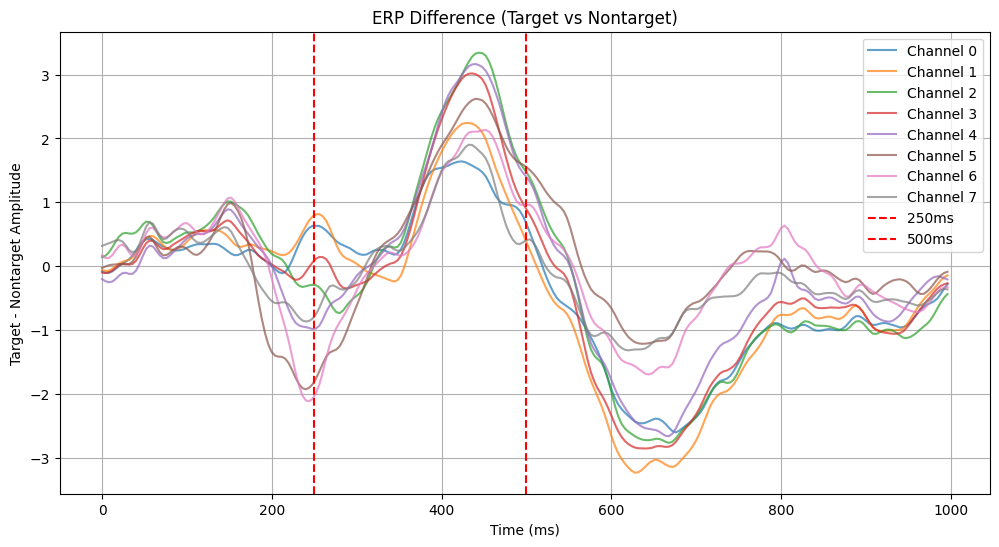

Оптимальное окно: 62-125
(23505, 8, 250)
(5877, 8, 250)
(4197, 8, 250)
Найдены классы в тренировочных данных: [0 1]
Длина последовательности после обрезки: 63
Начало обучения...
Найдены классы в тренировочных данных: [0 1]
Вычисленные веса классов: tensor([0.6000, 3.0011], device='cuda:0')

Epoch 1/100
Train Loss: 0.5386 | Val Loss: 0.5185
Train Acc: 0.5934 | Val Acc: 0.6115
Target F1: 0.3449 | Precision: 0.2474 | Recall: 0.5689
ROC AUC: 0.6115 | Specificity: 0.6541
LR: 1.22e-03 | Grad Norm: 0.3978
Best F1: 0.3449
------------------------------------------------------------

Epoch 2/100
Train Loss: 0.5203 | Val Loss: 0.5129
Train Acc: 0.6256 | Val Acc: 0.6239
Target F1: 0.3604 | Precision: 0.2735 | Recall: 0.5281
ROC AUC: 0.6239 | Specificity: 0.7197
LR: 1.86e-03 | Grad Norm: 0.4368
Best F1: 0.3604
------------------------------------------------------------

Epoch 3/100
Train Loss: 0.5133 | Val Loss: 0.5043
Train Acc: 0.6482 | Val Acc: 0.6306
Target F1: 0.3637 | Precision: 0.2594 | Re

In [3]:
model, history, accuracy = improved_pipeline(datapath, test_subject=8)